In [82]:
# ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

import matplotlib.pyplot as plt

In [83]:
from sklearn import datasets, svm, metrics

In [84]:
# The digits dataset
digits = datasets.load_digits()

In [85]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [86]:
images_and_labels = list(zip(digits.images, digits.target))

In [87]:
import numpy as np

In [88]:
np.shape(images_and_labels)

(1797, 2)

In [108]:
images_and_labels[:1]

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)]

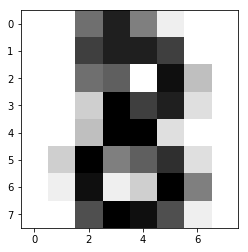

In [90]:
plt.imshow(images_and_labels[8][0], cmap=plt.cm.gray_r, interpolation='nearest')

In [91]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# e.g. flatten out 8 x 8 image matrix to 1 x 64 (row vector)
# and resulting data matrix will be n_samples x 64 matrix

# each pixel will become feature

In [93]:
np.shape(data)

(1797, 64)

In [94]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [95]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [97]:
expected[11], predicted[11]

(4, 4)

In [98]:
np.shape(expected)

(899,)

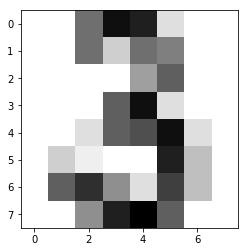

In [99]:
plt.imshow(images_and_labels[899 + 100][0], cmap=plt.cm.gray_r, interpolation='nearest')

In [100]:
images_and_labels[899 + 100][1]

3

In [101]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

In [102]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

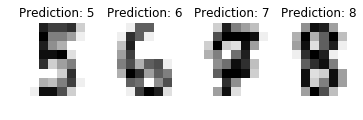

In [103]:
for index, (image, prediction) in enumerate(images_and_predictions[12:16]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

In [104]:
# Using custom kernel: dot-product (or linear kernel)
def my_kernel(X, Y):
    return np.dot(X, Y.T)

classifier = svm.SVC(kernel=my_kernel)

In [105]:
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function my_kernel at 0x1350d72f0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [106]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [107]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

# compared to rbf kernel above, .97 vs .94 f1-score

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function my_kernel at 0x1350d72f0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

   micro avg       0.94      0.94      0.94       899
   macro avg       0.95      0.94      0.94 